In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
def assign_clusters(X, centers, i):
    if i == 0:
        return np.array([np.argmin(np.linalg.norm(x - centers, axis=1)) for x in X])  # евклидово расстояние
    if i == 1:
        return np.array([np.argmin(np.sum(np.abs(x - centers), axis=1)) for x in X])  # расстояние городских кварталов

In [3]:
def move_centers(X, k, clusters, centers):
    new_centers = np.zeros_like(centers)
    for i in range(k):
        cluster = X[clusters == i]
        if not len(cluster):
            continue
        new_centers[i] = np.mean(cluster, axis=0)
    return new_centers


In [4]:
def KMeans(X, k, centers, i):
    clusters = assign_clusters(X, centers, i)
    clusters_equal = False
    while not clusters_equal:
        clusters = assign_clusters(X, centers, i)
        new_centers = move_centers(X, k, clusters, centers)
        clusters_equal = (clusters == assign_clusters(X, new_centers, i)).all()
        centers = new_centers
    return centers, clusters

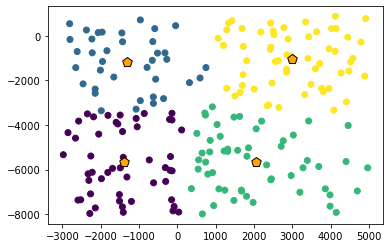

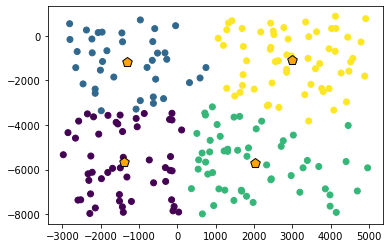

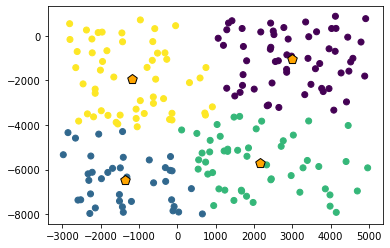

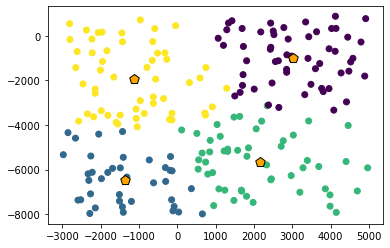

In [6]:
N = 200
k = 4
X = np.array([(random.uniform(-3000, 5000), random.uniform(-8000, 900)) for i in range(N)])
centers = np.zeros((k, 2))
for i in range(2):
    if i == 0:
        centers = X[np.random.choice(len(X), k)]
    if i == 1:
        centers = np.array([(max(X[:, 0]), max(X[:, 1])), (min(X[:, 0]), min(X[:, 1])), (max(X[:, 0]), min(X[:, 1])),
                            (min(X[:, 0]), max(X[:, 1]))])
    for j in range(2):
        centers, clusters = KMeans(X, k, centers, j)
        fig, axs = plt.subplots()
        axs.scatter(X[:, 0], X[:, 1], c=clusters)
        axs.scatter(centers[:, 0], centers[:, 1], c='orange', marker='p', s=100, edgecolors= "black")
        plt.show()
